# PRASUNET Internship

# TASK-03

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

# Dataset Overview
1.	Attributes: 20 features including demographic, economic, and campaign data (e.g., age, job, marital status, education, loans, contact type, last contact details, campaign stats, economic indicators)

2.	Target Variable: y (binary: "yes" or "no" indicating subscription to a term deposit)

3.	Total Instances: 41,188

4.	Type of Data: Mix of categorical and numerical attributes

# Import necessary libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the Data

In [2]:
file_path = 'D:/Internship/Prasunet/Task 3/bank-additional/bank-additional/bank-additional-full.csv'
data = pd.read_csv(file_path, sep=';')

# Explore the Data
print(data.head())
print(data.info())
print(data.describe())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

# Preprocess the Data

In [3]:
# Encode categorical variables
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Separate features and target variable

In [4]:
X = data.drop('y', axis=1)
y = data['y']

# Split the Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter Tuning with Grid Search

In [6]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

In [7]:
# Best Parameters
print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [8]:
# Best Estimator
best_classifier = grid_search.best_estimator_
best_classifier

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       random_state=42)

# Cross-Validation Score

In [9]:
cv_scores = cross_val_score(best_classifier, X_train, y_train, cv=5)
print('Cross-Validation Accuracy Scores:', cv_scores)
print('Mean Cross-Validation Accuracy:', cv_scores.mean())

Cross-Validation Accuracy Scores: [0.89942778 0.90721471 0.90981616 0.90825529 0.90825529]
Mean Cross-Validation Accuracy: 0.9065938457239424


# Evaluate the Model

In [10]:
best_classifier.fit(X_train, y_train)
y_pred = best_classifier.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='binary'))
print('Recall:', recall_score(y_test, y_pred, average='binary'))
print('F1 Score:', f1_score(y_test, y_pred, average='binary'))

Accuracy: 0.9084729303228939
Precision: 0.5968468468468469
Recall: 0.572354211663067
F1 Score: 0.5843439911797133


# Visualize the Decision Tree

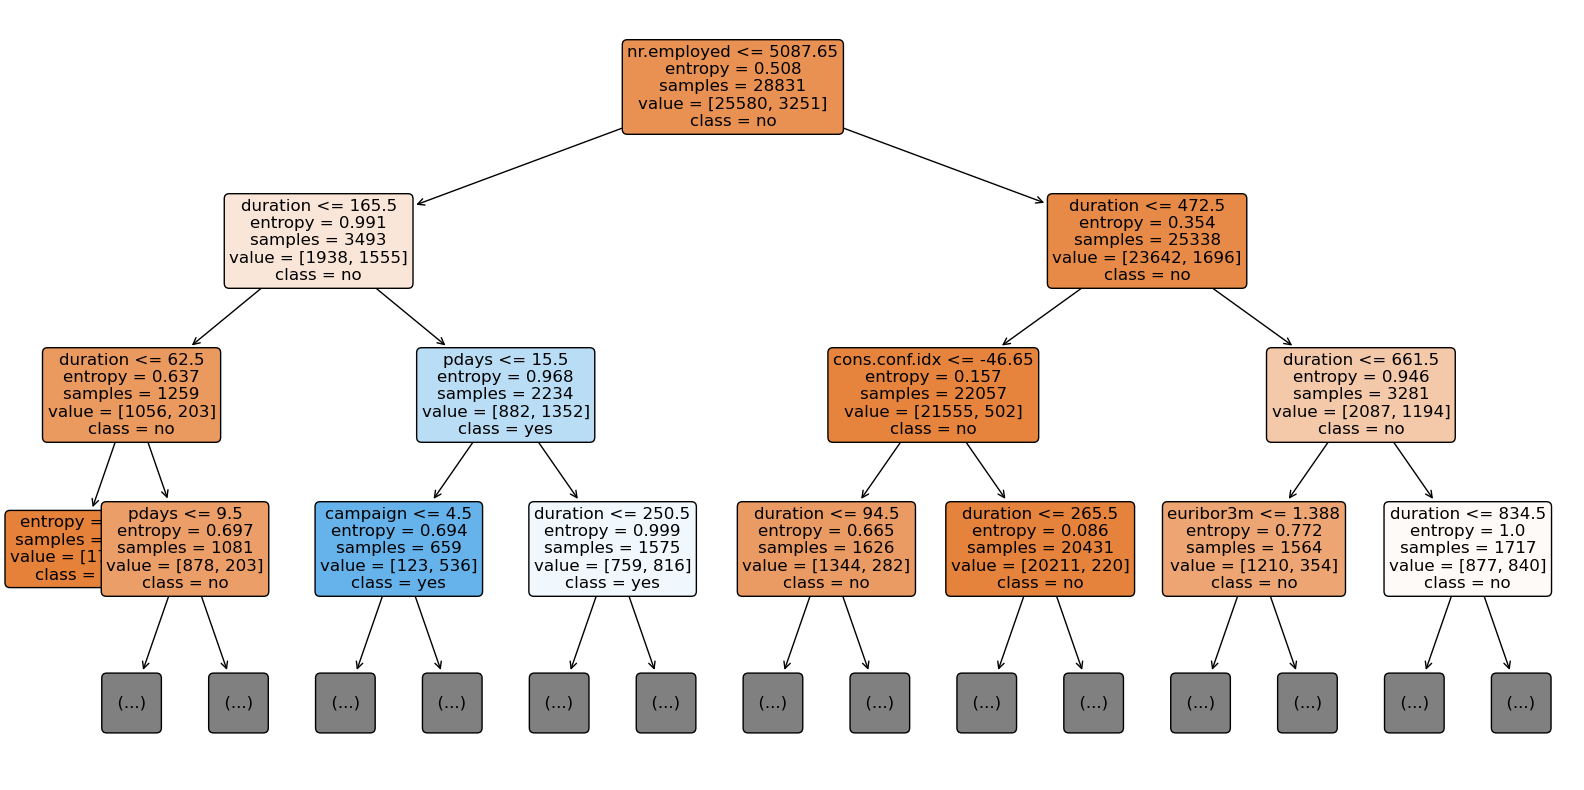

In [11]:
# Convert feature names to a list
feature_names = X.columns.tolist()

# Visualize the Decision Tree with depth limitation
plt.figure(figsize=(20, 10))  # Adjust the size as needed

# Set max_depth for visualization if tree is large
max_depth_visualization = 3  # Adjust as needed for clarity

plot_tree(best_classifier, 
          feature_names=feature_names, 
          class_names=['no', 'yes'], 
          filled=True, 
          rounded=True, 
          fontsize=12,
          max_depth=max_depth_visualization)

# Save the plot to a file
plt.savefig("decision_tree.png", format='png', bbox_inches='tight')
plt.show()

1.	Convert Feature Names: The line feature_names = X.columns.tolist() converts the Pandas Index to a list, which plot_tree requires.

2.	Limiting Tree Depth for Visualization: For large decision trees,  max_depth_visualization = 3 sets the maximum depth of the tree for the plot to improve clarity.

3.	Saving the Plot: plt.savefig("decision_tree.png", format='png', bbox_inches='tight') saves the tree plot to a file named decision_tree.png.

# Key Findings
1.	Feature Importance: The decision tree highlights which features are critical for predicting customer behavior, such as duration, contact, and poutcome.

2.	Model Robustness: The cross-validation approach confirms that the model performs consistently across different subsets of the data, indicating robustness.

3.	Practical Application: The insights from the model can be used to enhance marketing strategies by focusing on the most influential customer characteristics.